In [41]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [42]:
df=pd.read_csv(r'./rq_1_2.csv')

In [43]:
len(df)

641628

In [44]:
df.columns

Index(['product', 'issue_id', 'part_of_day_commit', 'committer', 'hash',
       'commit_time', 'message_sentiment', 'issuetype', 'priority',
       'category'],
      dtype='object')

In [45]:
def mww_test_between_sentiment(data, category_column):
    unique_categories = data[category_column].unique()
    
    results = []
    
    for category in unique_categories:
        positive_data = data[data[category_column] == category]['sentiment_score_positive']
        negative_data = data[data[category_column] == category]['sentiment_score_negative']
        
        u_statistic, p_value = stats.mannwhitneyu(positive_data, negative_data)
        
        results.append({
            f'{category_column}': category,
            'u_statistic': u_statistic,
            'p_value': p_value
        })
        
    return pd.DataFrame(results)

def mww_test_between_categories(data, category_column):
    unique_categories = data[category_column].unique()
    
    results = []
    
    for category1, category2 in combinations(unique_categories, 2):
        category1_data = data[data[category_column] == category1]['sentiment_score_cumulative']
        category2_data = data[data[category_column] == category2]['sentiment_score_cumulative']
        
        u_statistic, p_value = stats.mannwhitneyu(category1_data, category2_data)
        
        results.append({
            f'{category_column}1': category1,
            f'{category_column}2': category2,
            'u_statistic': u_statistic,
            'p_value': p_value
        })
        
    return pd.DataFrame(results)

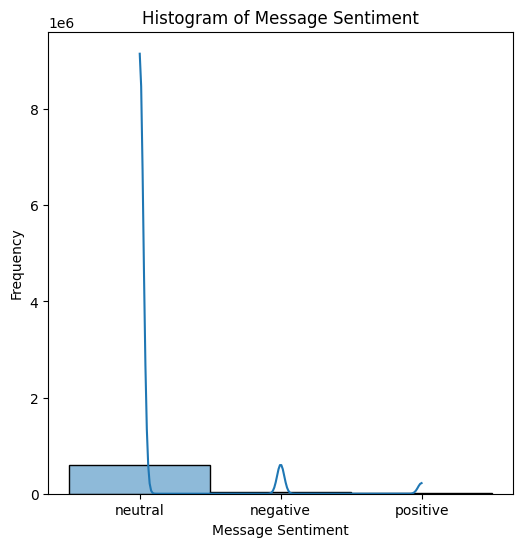

In [46]:
plt.figure(figsize=(6, 6))
sns.histplot(df['message_sentiment'], kde=True)
plt.title('Histogram of Message Sentiment')
plt.xlabel('Message Sentiment')
plt.ylabel('Frequency')
plt.show()



In [47]:
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sentiment_score'] = df['message_sentiment'].map(sentiment_mapping)
 
df['is_negative'] = df['message_sentiment'] == 'negative'
df['is_positive'] = df['message_sentiment'] == 'positive'
df['is_neutral'] = df['message_sentiment'] == 'neutral'

# df['is_bug'] = df['issuetype'] == 'bug'
# df['is_nonbug'] = df['issuetype'] != 'bug'
# 
# df['is_blocker'] = df['priority'] == 'Blocker'
# df['is_critical'] = df['priority'] == 'Critical'
# df['is_major'] = df['priority'] == 'Major'
# df['is_minor'] = df['priority'] == 'Minor'
# df['is_trivial'] = df['priority'] == 'Trivial'

cumulative_scores = df.groupby('issue_id')['sentiment_score'].sum().reset_index()
positive_scores = df.groupby('issue_id')['is_positive'].sum().reset_index()
negative_scores = df.groupby('issue_id')['is_negative'].sum().reset_index()

df = df.merge(cumulative_scores, on='issue_id', suffixes=('', '_cumulative'))
df = df.merge(positive_scores, on='issue_id', suffixes=('', '_count'))
df = df.rename(columns={'is_positive_count': 'sentiment_score_positive'})
df = df.merge(negative_scores, on='issue_id', suffixes=('', '_count'))
df = df.rename(columns={'is_negative_count': 'sentiment_score_negative'})

assert len(df[df['sentiment_score_cumulative'] != df['sentiment_score_positive'] - df['sentiment_score_negative']]) == 0
print(len(df))
df.sample(10)

641628


,product,issue_id,part_of_day_commit,committer,hash,commit_time,message_sentiment,issuetype,priority,category,sentiment_score,is_negative,is_positive,is_neutral,sentiment_score_cumulative,sentiment_score_positive,sentiment_score_negative
468587,TOBAGO,12549147,Afternoon,743368ce561def9a0bc512689693f59ab0eb8ba3,f0ddf88ad41ae0600887c18a21d2c2a7f44157c2,2012-04-24 14:07:59+00:00,neutral,Bug,Major,high,0,False,False,True,0,0,0
538758,ZOOKEEPER,12426931,Afternoon,1e7bb2d9589ea856006a86987b2ba8efe4c8df25,7a1109e0e4a72023cb4c98af878ec3768d69c815,2010-01-05 17:38:44+00:00,neutral,non-bug,Major,high,0,False,False,True,0,0,0
80214,SLING,12709046,Morning,e166dbd5eb743e016d53f99dd426deda53d44e6a,f2aed1abd61c91cb633483fdbfbea7a37ed58be2,2014-05-21 09:10:57+00:00,neutral,non-bug,Major,high,0,False,False,True,0,0,0
125019,CAMEL,13048301,Afternoon,69102080e944da1f19b5ceb916edafea521dc9be,bd1274ce4e38c0c500a7f0d2c873e091d39f5538,2017-03-06 13:04:23+00:00,neutral,non-bug,Minor,high,0,False,False,True,0,0,0
513823,RANGER,13079421,Afternoon,a75df8ab342db5ac58da4a52246532851fd51730,b47fe34779beb4be49015ca2f3dfecae7413135a,2017-07-10 10:11:11+00:00,neutral,Bug,Major,medium,0,False,False,True,0,0,0
306471,PHOENIX,12963910,Morning,5aa612bf16c8dbbdd84b677260ccbc2890d14e97,7b7f3f64288e0c3a3847f0f94f206dd119739db7,2016-04-29 18:28:40+00:00,negative,Bug,Major,high,-1,True,False,False,-4,0,4
375255,GEODE,13128057,Evening,0e8a277835ba5e42133f2daad693a7fbbb7097f7,12307b8ca09029e795767a97e650234a0c7ceb9e,2018-01-05 02:06:34+00:00,neutral,Bug,Major,medium,0,False,False,True,0,0,0
361483,GROOVY,12818387,Night,b4fc31900ec7e1703a29e62ded062e0db02b0d3e,15525b7711c6968cc073dd4d18753e4fd1396448,2010-05-03 04:25:18+00:00,neutral,non-bug,Minor,high,0,False,False,True,0,0,0
401138,JAMES,13165503,Afternoon,a591a2ed409c9eb651e448b0fd161cbf88be5b91,dc5cefcd789e167b4d5ec28703e4de3cf0ec09d7,2018-06-15 08:52:24+00:00,neutral,non-bug,Minor,low,0,False,False,True,0,0,0
540227,ARTEMIS,13203051,Morning,428e01fff1173306bf54bd42fdc2d70c71ead37a,a65b62b4ede204843f5646d1e417e7c75b9c39f8,2018-12-13 16:48:44+00:00,neutral,Bug,Trivial,high,0,False,False,True,0,0,0


In [48]:
df.columns

Index(['product', 'issue_id', 'part_of_day_commit', 'committer', 'hash',
       'commit_time', 'message_sentiment', 'issuetype', 'priority', 'category',
       'sentiment_score', 'is_negative', 'is_positive', 'is_neutral',
       'sentiment_score_cumulative', 'sentiment_score_positive',
       'sentiment_score_negative'],
      dtype='object')

In [49]:
# make a table for only the individual issues

df_issues = df.drop_duplicates(subset='issue_id')
df_issues = df_issues[['issue_id', 'product', 'issuetype','part_of_day_commit', 'category', 'sentiment_score_cumulative', 'sentiment_score_positive', 'sentiment_score_negative']]

print(len(df_issues))
df_issues.sample(10)

297648


,issue_id,product,issuetype,part_of_day_commit,category,sentiment_score_cumulative,sentiment_score_positive,sentiment_score_negative
541418,12756555,ARTEMIS,non-bug,Afternoon,high,0,0,0
484092,13213328,OPENMEETINGS,Bug,Afternoon,high,0,0,0
629328,12901269,REEF,Bug,Afternoon,high,0,0,0
71790,13057659,AMBARI,Bug,Night,high,0,0,0
503219,13208280,CARBONDATA,Bug,Afternoon,high,0,0,0
193763,13020986,HIVE,non-bug,Morning,high,0,0,0
619898,12842177,SENTRY,non-bug,Afternoon,medium,0,0,0
525782,12452947,WW,Bug,Afternoon,high,0,0,0
354881,12665696,CXF,non-bug,Evening,high,0,0,0
472063,12774141,TOBAGO,non-bug,Morning,high,0,0,0


In [50]:
df_issues.describe()

,issue_id,sentiment_score_cumulative,sentiment_score_positive,sentiment_score_negative
count,2.976480e+05,297648.000000,297648.000000,297648.000000
mean,1.286328e+07,-0.083444,0.047707,0.131152
std,3.828417e+05,0.693179,0.315237,0.626490
min,1.334000e+04,-96.000000,0.000000,0.000000
25%,1.266636e+07,0.000000,0.000000,0.000000
50%,1.290651e+07,0.000000,0.000000,0.000000
75%,1.309605e+07,0.000000,0.000000,0.000000
max,1.328001e+07,36.000000,41.000000,108.000000


In [51]:
rq2_contingency_table = pd.crosstab(df['category'], df['message_sentiment'])
rq2_contingency_table

message_sentiment,negative,neutral,positive
category,,,
high,32721,495019,12184
low,884,12261,196
medium,5432,81111,1820


In [52]:
chi2, p, dof, expected = stats.chi2_contingency(rq2_contingency_table)

print(f"\nChi-Square Test Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Test Statistic: 55.06789956317945
p-value: 3.144267142940528e-11
Degrees of Freedom: 4
Expected Frequencies:
[[3.28492728e+04 4.95125559e+05 1.19491681e+04]
 [8.11673769e+02 1.22340738e+04 2.95252389e+02]
 [5.37605346e+03 8.10313670e+04 1.95557956e+03]]


In [53]:
observed = rq2_contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)
residuals_df = pd.DataFrame(residuals, index=rq2_contingency_table.index, columns=rq2_contingency_table.columns)

print("\nStandardized Residuals:")
print(residuals_df)


Standardized Residuals:
message_sentiment  negative   neutral  positive
category                                       
high              -0.707736 -0.151437  2.148267
low                2.538663  0.243438 -5.776227
medium             0.763030  0.279748 -3.065889


In [54]:
df_issues.columns

Index(['issue_id', 'product', 'issuetype', 'part_of_day_commit', 'category',
       'sentiment_score_cumulative', 'sentiment_score_positive',
       'sentiment_score_negative'],
      dtype='object')

In [55]:
mww_test_between_categories(df_issues, 'category')

,category1,category2,u_statistic,p_value
0,high,medium,5.037035e+09,0.118734
1,high,low,6.968898e+08,0.081487
2,medium,low,1.096774e+08,0.285887


In [56]:
mww_test_between_sentiment(df_issues, 'category')

,category,u_statistic,p_value
0,high,3.053065e+10,0.000000e+00
1,medium,7.579681e+08,1.261450e-163
2,low,1.429859e+07,4.899719e-31


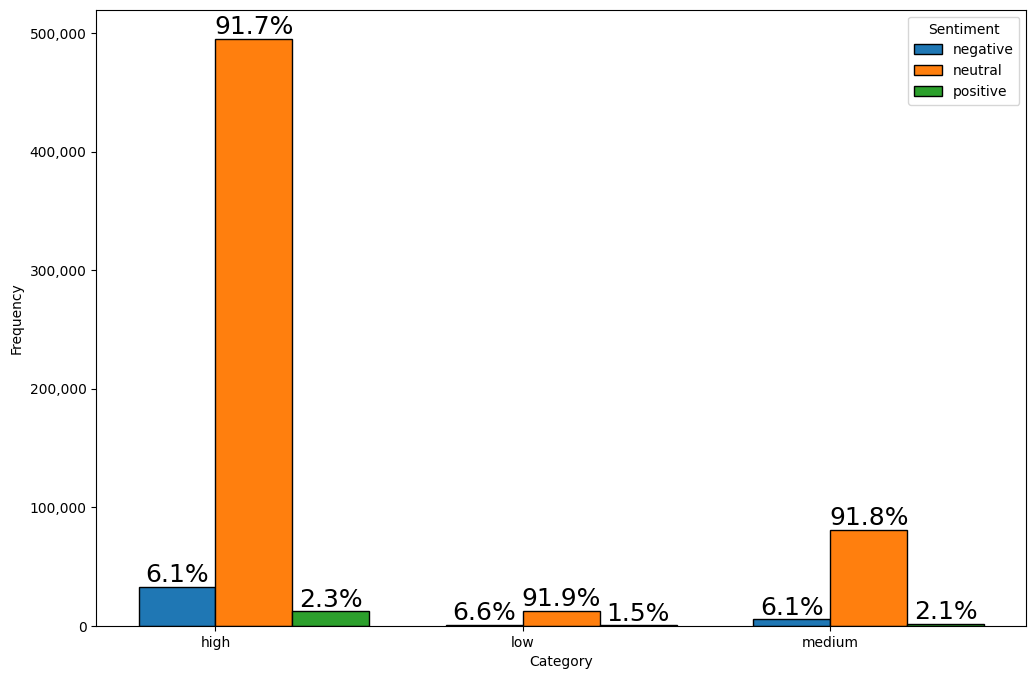

In [57]:
grouped = df.groupby(['category', 'message_sentiment']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))  

sentiments = grouped.columns
issue_types = grouped.index

bar_width = 0.25
bar_positions = list(range(len(issue_types)))

for i, sentiment in enumerate(sentiments):
    offset = i * bar_width - bar_width / 2

    bars = plt.bar([pos + offset for pos in bar_positions], grouped[sentiment], width=bar_width, label=sentiment, edgecolor='k')
    
    for bar, pct in zip(bars, grouped_percent[sentiment]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=18)


# Customize plot
plt.xlabel('Category')
plt.ylabel('Frequency')
# plt.title('Sentiment Frequencies by Issue Type')
plt.xticks(bar_positions, issue_types)
plt.legend(title='Sentiment', loc='upper right')
plt.gca().get_xaxis().tick_bottom() 
plt.gca().get_yaxis().tick_left()  
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(False)
plt.show()

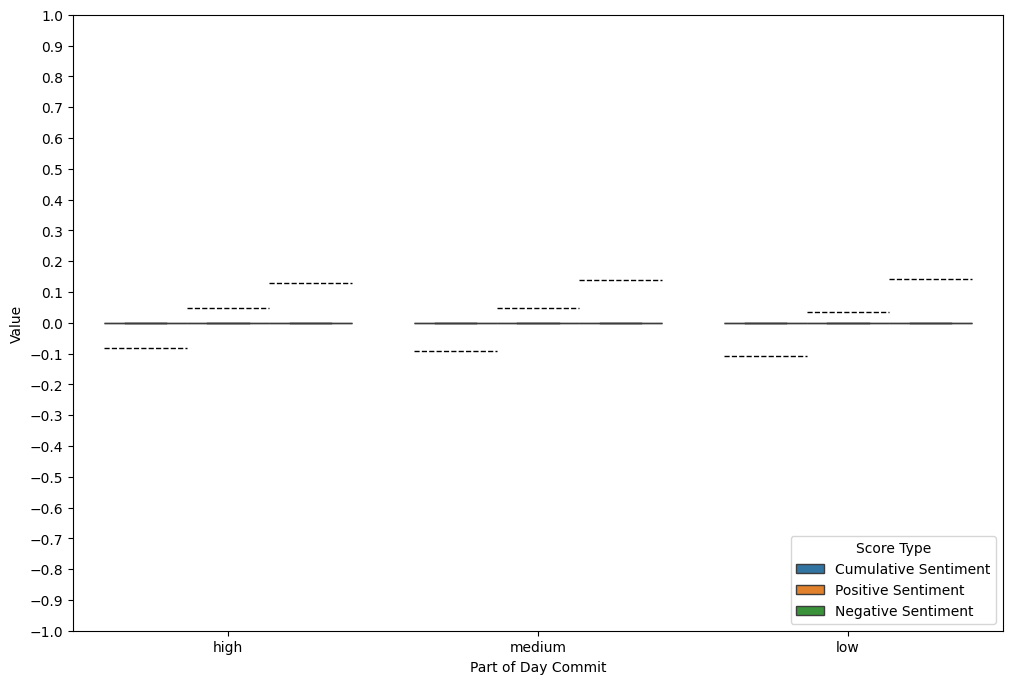

In [58]:
df = df_issues

melted = pd.melt(
    df,
    id_vars=['category'],
    value_vars=['sentiment_score_cumulative', 'sentiment_score_positive', 'sentiment_score_negative'],
    var_name='score_type',
    value_name='score'
)

# rename score types
melted['score_type'] = melted['score_type'].map({
    'sentiment_score_cumulative': 'Cumulative Sentiment',
    'sentiment_score_positive': 'Positive Sentiment',
    'sentiment_score_negative': 'Negative Sentiment'
})

plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='score', hue='score_type', data=melted, showmeans=True, meanline=True, fliersize=0,
            meanprops={'linestyle': '--', 'linewidth': 1, 'color': 'k'})
# plt.title('Distribution of mean positive, negative, and cumulative sentiment scores for issue types.')
plt.xlabel('Part of Day Commit')
plt.ylabel('Value')
plt.ylim(-0.5, 0.5)
plt.yticks(np.arange(-1, 1.1, 0.1))
plt.legend(title='Score Type', loc='lower right')
plt.show()